# Examplary usage of our Evaluation Pipeline

The pipeline constructs a 4-Fold, each split represents the 10-minute drive of a single person. Therefore, in each fold one person's drive is used as test data whereas the remaining 3 drives are used for training. This approach ensures a stratified cross validation as each person drove the same road with the same labeling. 

![4-Fold CV](4-Fold-CV.png)

In [1]:
import sys
sys.path.append('..')
import pandas as pd

from utils.preprocessing import PreprocessingPipeline

## 1. Preprocessing and 4-Fold CV Setup

In [2]:
# Define the start and end NTP times for each person's drive to remove standing times
ntp_intervals = {  # file+path: (start_ntp, end_ntp)
    '1_marco': ('2024-05-28 15:21:46.830', '2024-05-28 15:36:21.000'),
    '2_svenja': ('2024-05-28 15:39:02.218', '2024-05-28 15:52:16.613'),
    '3_konstantin': ('2024-05-28 15:56:31.000', '2024-05-28 16:09:37.000'),
    '4_aleyna': ('2024-05-28 16:11:26.149', '2024-05-28 16:21:35.000'),
}

In [3]:
pipeline = PreprocessingPipeline(ntp_intervals=ntp_intervals)
splits = pipeline.run() 

#### Structure of the splits
splits = [split1, split2, split3, split4]

split1 = (X_train, y_train, X_test, y_test)

In [4]:
# Examplray usage for a 4-Fold Cross-Validation
for i, (X_train, y_train, X_test, y_test) in enumerate(splits):
    print(f'Fold {i+1}')
    print(f'Train: {X_train.shape[0]}, Test: {X_test.shape[0]}\n')

Fold 1
Train: 4377, Test: 1747

Fold 2
Train: 4537, Test: 1587

Fold 3
Train: 4553, Test: 1571

Fold 4
Train: 4908, Test: 1216



<Axes: title={'center': "b'roughness_high'"}>

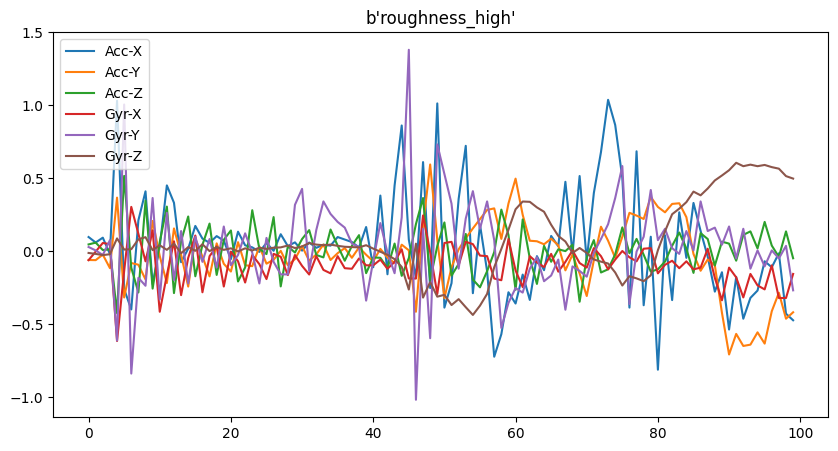

In [5]:
# Show first sample of a split
X_train, y_train, X_test, y_test = splits[0]
pd.DataFrame(X_train[0], columns=['Acc-X', 'Acc-Y', 'Acc-Z', 'Gyr-X', 'Gyr-Y', 'Gyr-Z']).plot(figsize=(10,5), title=y_train[0])

In [6]:
pd.DataFrame(X_train[0])

,0,1,2,3,4,5
0,0.097044,-0.060346,0.046379,-0.061520,0.028689,-0.012133
1,0.059517,-0.061244,0.058746,-0.002605,0.005250,-0.018504
2,0.092755,-0.023529,0.007904,0.056310,-0.026001,-0.026999
3,-0.018753,-0.116022,0.012943,0.048455,0.075565,-0.020628
4,1.030928,0.367096,-0.424477,-0.615323,-0.611957,0.087687
...,...,...,...,...,...,...
95,-0.069147,-0.633263,0.200735,-0.261832,-0.104128,0.591035
96,-0.109890,-0.411460,0.038592,-0.096869,0.005250,0.576169
97,-0.014465,-0.284843,-0.039273,-0.320747,-0.049439,0.565549
98,-0.428333,-0.462645,0.135695,-0.320747,0.036501,0.514577


## 2. Feature extraction (for supervised feature selection techniques)

In [7]:
from utils.feature_extraction import compute_features

In [8]:
train_features = compute_features(X_train)
train_features.head()

100%|██████████| 4377/4377 [00:12<00:00, 339.93it/s]


,mean_acc_x,median_acc_x,mode_acc_x,std_acc_x,var_acc_x,rms_acc_x,mad_acc_x,avg_deriv_acc_x,skew_acc_x,zcr_acc_x,...,corr_acc_y_acc_z,corr_acc_y_gyro_x,corr_acc_y_gyro_y,corr_acc_y_gyro_z,corr_acc_z_gyro_x,corr_acc_z_gyro_y,corr_acc_z_gyro_z,corr_gyro_x_gyro_y,corr_gyro_x_gyro_z,corr_gyro_y_gyro_z
0,0.044774,0.032176,-0.386517,0.358619,0.128607,0.361403,0.172624,-0.005762,0.621430,41,...,-0.361245,0.254042,-0.017333,-0.522619,-0.070180,0.125179,0.101717,0.046050,-0.401886,-0.241885
1,0.022269,-0.035909,-0.386517,0.545300,0.297352,0.545754,0.300751,-0.012173,0.233170,34,...,0.054048,0.144117,0.062685,-0.370785,-0.073914,-0.499718,0.175643,-0.030123,-0.465385,-0.252933
2,0.353792,0.245007,-0.023042,1.190936,1.418327,1.242375,0.536635,-0.001625,0.491690,40,...,-0.193245,0.198488,-0.051900,0.075248,-0.204857,-0.068965,0.089052,0.008567,-0.200159,-0.528498
3,0.454708,0.341505,-3.793962,1.134751,1.287659,1.222464,0.465334,-0.028170,0.403273,40,...,-0.521520,0.356030,-0.007606,-0.032440,-0.281011,0.109411,0.093527,0.202940,-0.343194,-0.686681
4,0.222277,0.277709,0.383321,0.730516,0.533654,0.763584,0.464262,0.001928,-0.320178,32,...,-0.528906,0.402836,-0.023395,-0.284889,-0.189775,0.105017,0.065608,0.098832,-0.351153,-0.491356
